In [186]:
import numpy as np
import matplotlib.pyplot as plt


In [187]:
def create_PLOT(X_LIM=15, Y_LIM=10, fig_size=(16, 8)):
    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((-X_LIM, X_LIM))
        ax[i].set_ylim((-Y_LIM, Y_LIM))
        ax[i].plot([-X_LIM, X_LIM], [0, 0], c="r")
        ax[i].plot([0, 0], [-Y_LIM, Y_LIM], c="r")
        
    return fig, ax

In [188]:
def print_obj(ax, matrics, colour, label):
    m, n = matrics.shape
    M = matrics[:m-1, :]
    M = M.T
    for i in range(n):
        ax.plot([M[i, 0], M[(i+1)%n, 0]], [M[i, 1], M[(i+1)%n, 1]], c=colour, label=label)
        ax.text(M[i, 0], M[i, 1], "({}, {})".format(np.around(M[i, 0], 1), np.around(M[i, 1], 1)))

    return ax

In [189]:
def reflection(theta, c, obj, X_LIM=10, Y_LIM=10):
    T_v = np.array([[1, 0, 0], \
                    [0, 1, c], \
                    [0, 0, 1]])
    T_minus_v = np.array([[1, 0, 0], \
                          [0, 1,-c], \
                          [0, 0, 1]])
    R_minus_theta = np.array([[ np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta)), 0], \
                              [-np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                              [                         0,                         0, 1]])
    R_theta = np.array([[np.cos(np.deg2rad(theta)),-np.sin(np.deg2rad(theta)), 0], \
                        [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0], \
                        [                        0,                         0, 1]])
    Ref_x =  np.array([[1, 0, 0], \
                       [0,-1, 0], \
                       [0, 0, 1]])
    m = np.tan(np.deg2rad(theta))
    fig, ax = create_PLOT(X_LIM=X_LIM, Y_LIM=Y_LIM)
    x = np.arange(-X_LIM, X_LIM+1)
    ax[0].plot(x, m*x+c, label="y=mx+c")
    ax[1].plot(x, m*x+c, label="y=mx+c")
    ax[0].set_title("Before Reflection")
    ax[0] = print_obj(ax[0], obj, "green", label="Original_Object")

    obj1 = np.dot(T_minus_v, obj)
    obj2 = np.dot(R_minus_theta, obj1)
    obj3 = np.dot(Ref_x, obj2)
    obj4 = np.dot(R_theta, obj3)
    obj_prime = np.dot(T_v, obj4)
    ax[1].set_title("After Reflection")
    ax[1] = print_obj(ax[1], obj_prime, "blue", label="Reflected Object")
    
    return fig, ax

/tmp/ipykernel_2812/1983570381.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


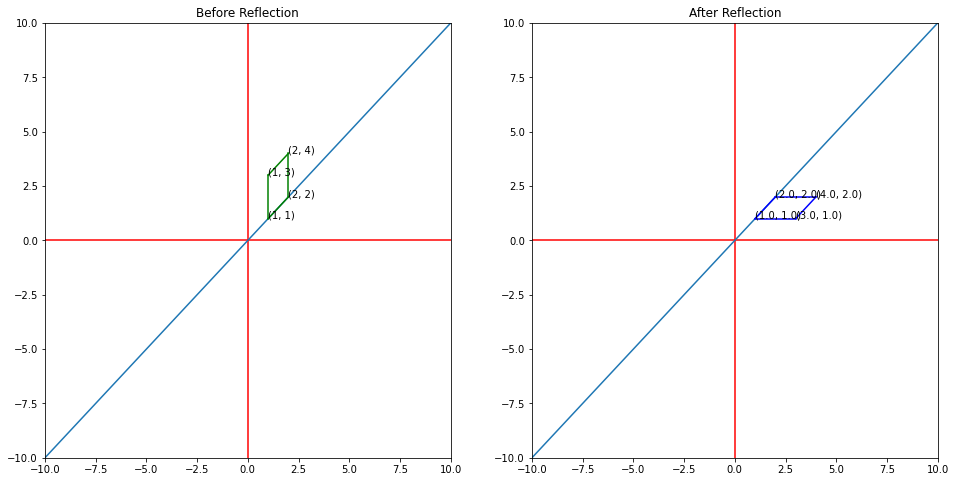

In [190]:
obj = np.array([[1, 2, 2, 1], \
                [1, 2, 4, 3],\
                [1, 1, 1, 1]])


fig, ax = reflection(45, 0, obj)

fig.show()

/tmp/ipykernel_2812/2379628159.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


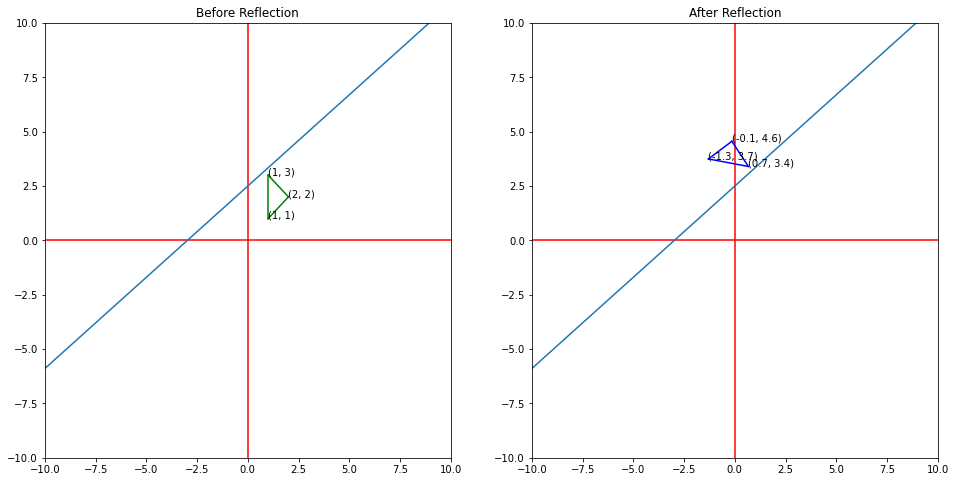

In [191]:
obj = np.array([[1, 2, 1], \
                [1, 2, 3],\
                [1, 1, 1]])


fig, ax = reflection(40, 2.5, obj)

fig.show()